In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
%matplotlib inline
np.set_printoptions(precision=2)
plt.style.use('seaborn-notebook')

In [4]:
from scipy.stats import poisson
from scipy.stats import norm

In [19]:
def scale_free_poisson_rand_meas(mu=1, size=1):
    num_summands = poisson.rvs(mu=mu, size=size) 
    vals = np.asanyarray([np.sign(val) * (1 - np.exp(-np.abs(val))) * np.sum(norm.rvs(size=np.abs(val))) if val else 0 for val in num_summands])
    return vals

In [20]:
mu = 1
size = 1000

In [39]:
thing1 = scale_free_poisson_rand_meas(mu=2, size=10000) / np.sqrt(2)
thing2 = scale_free_poisson_rand_meas(mu=1, size=10000) / np.sqrt(1)

In [40]:
np.sum(thing1 == 0)

1323

In [41]:
np.sum(thing2 == 0)

3739

In [42]:
percentiles = np.linspace(0, 100, 100)

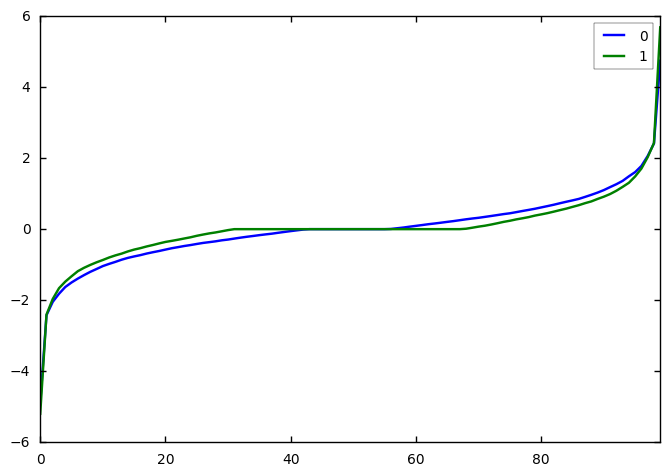

In [43]:
pd.DataFrame([np.percentile(thing1, q=percentiles), np.percentile(thing2, q=percentiles)]).T.plot()

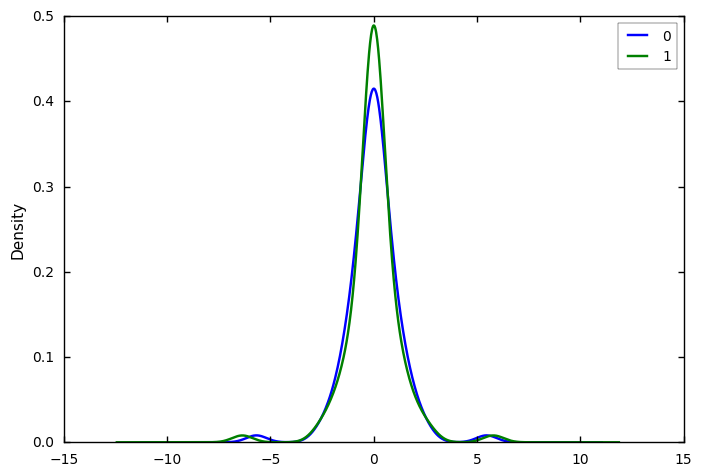

In [18]:
ax = pd.DataFrame([np.percentile(thing1, q=percentiles), np.percentile(thing2, q=percentiles)]).T.plot(kind='kde',
                                                                                                       color=['blue', 'green'])
#ax.hist([np.percentile(thing1, q=percentiles), np.percentile(thing2, q=percentiles)], normed=True, 
#        histtype='bar', color=['blue', 'green'], bins=15)